In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

In [2]:
Customer_data = pd.read_csv(r"C:\Users\USER\Videos\Learning Videos\Materials & Sample Data\Raw Data\Excel - Mall_Customers (CSV).csv", index_col = 'CustomerID')
Customer_data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


### Univariate Analysis

In [3]:
Customer_data.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [4]:
columns = ['Age','Annual Income (k$)','Spending Score (1-100)']

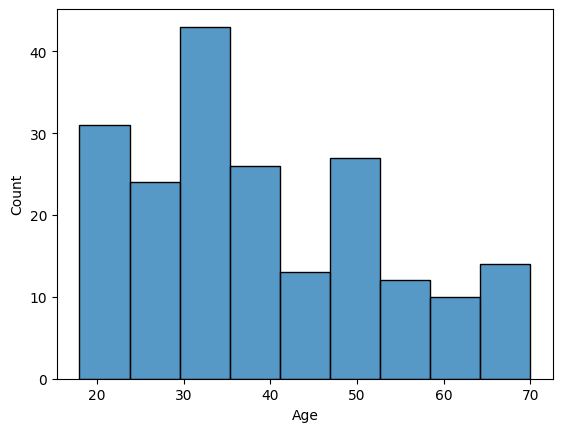

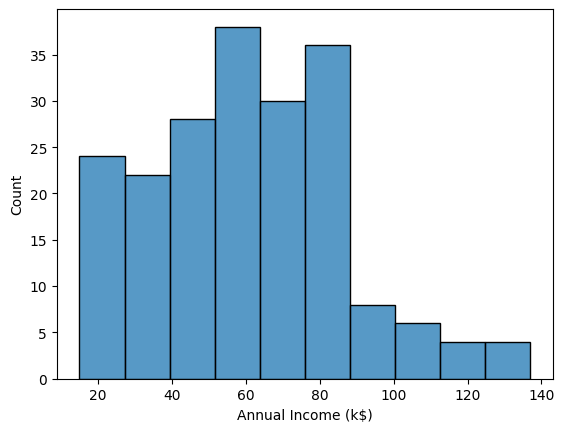

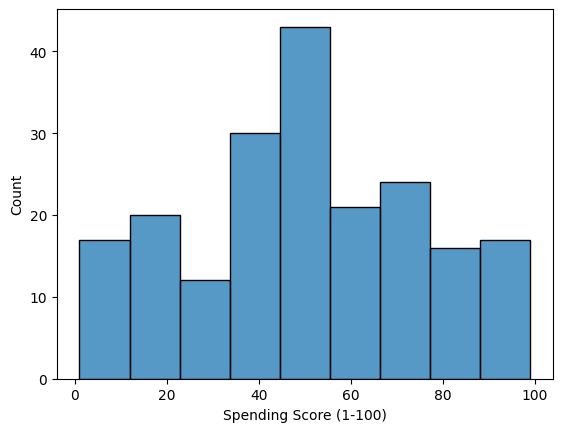

In [5]:
for i in columns:
    plt.figure()
    sns.histplot(Customer_data[i])

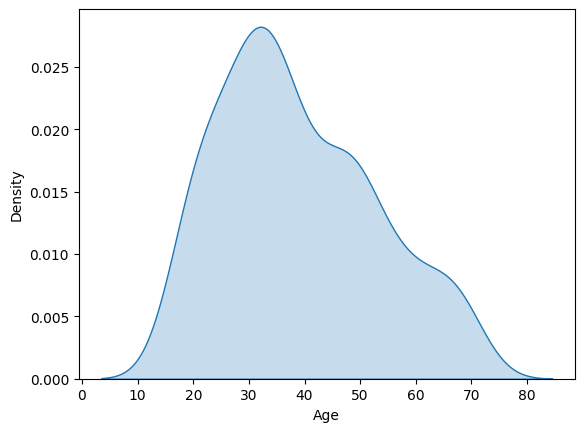

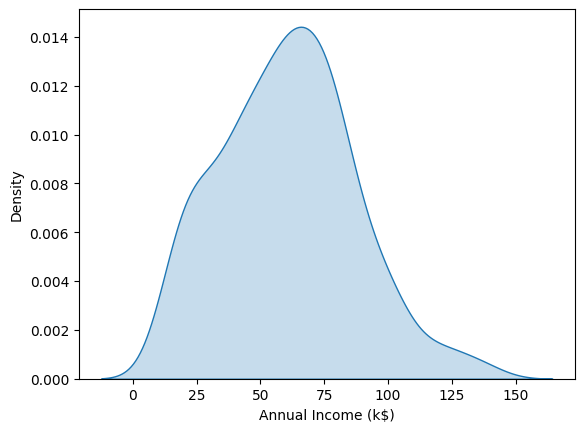

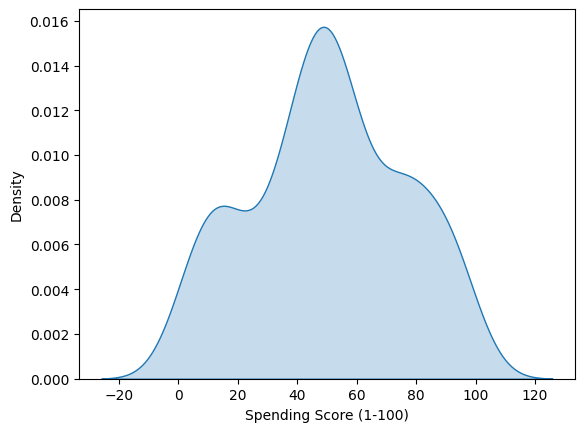

In [6]:
for i in columns:
    plt.figure()
    sns.kdeplot(Customer_data[i], fill = True)

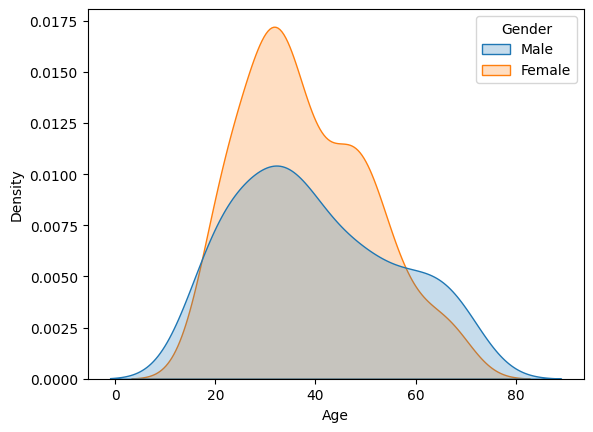

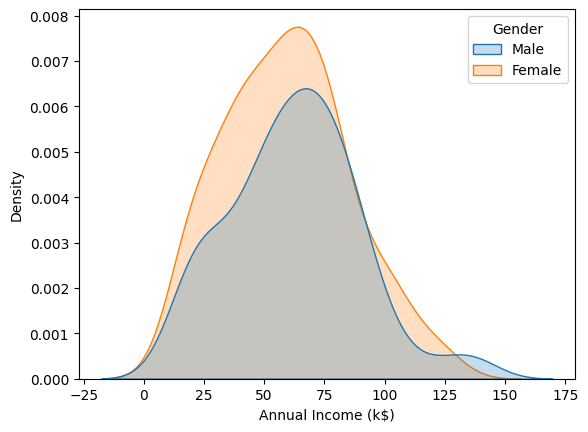

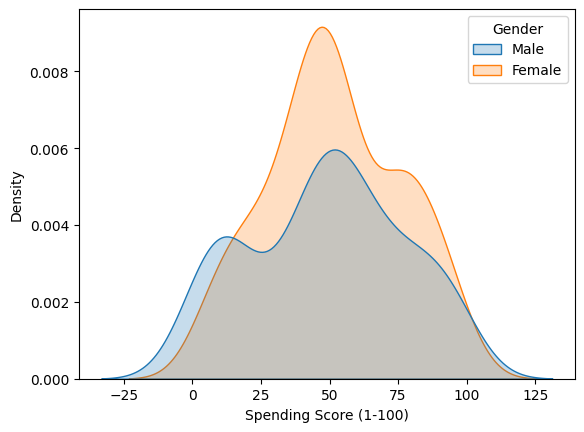

In [7]:
for i in columns:
    plt.figure()
    sns.kdeplot(x = Customer_data[i], fill = True, hue = Customer_data['Gender'])

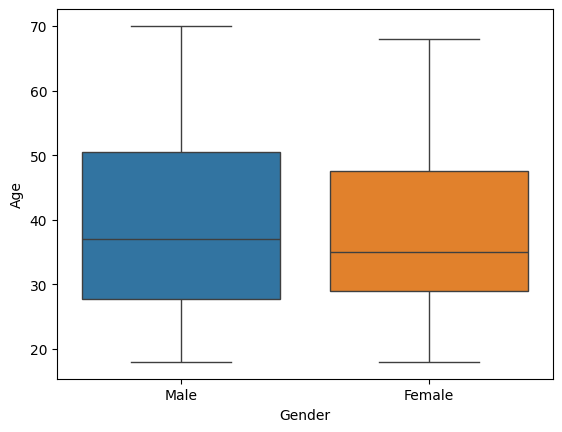

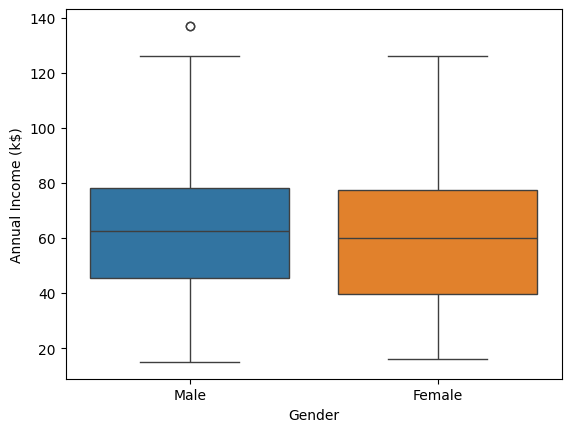

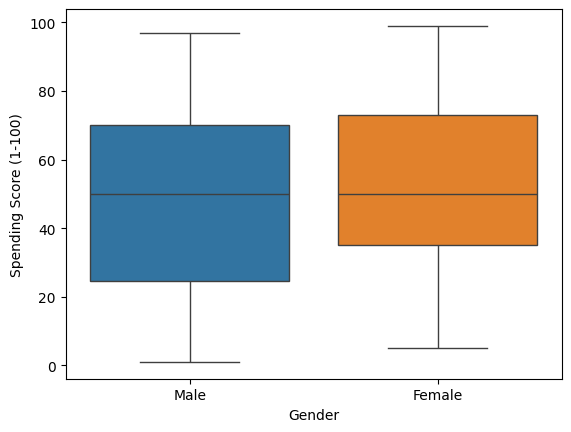

In [8]:
for i in columns:
    plt.figure()
    sns.boxplot(x = Customer_data['Gender'], y = Customer_data[i], hue = Customer_data['Gender'])

In [9]:
Customer_data['Gender'].value_counts(normalize = True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

### Bivariate Analysis

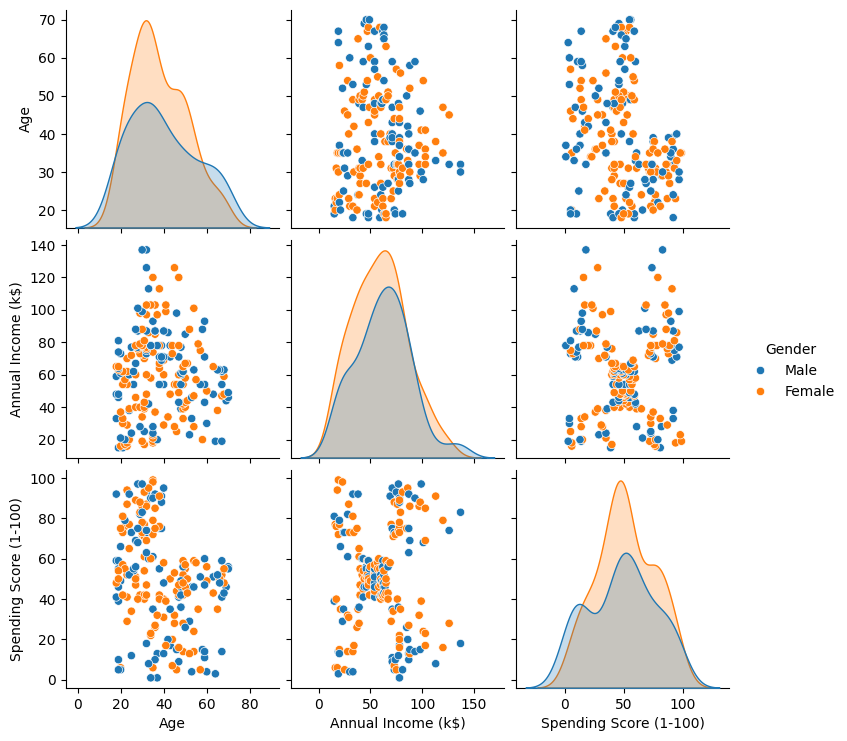

In [10]:
sns.pairplot(Customer_data, hue = 'Gender');

In [11]:
Customer_data.groupby(['Gender'])[columns].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [12]:
Customer_data.corr(numeric_only = True)

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


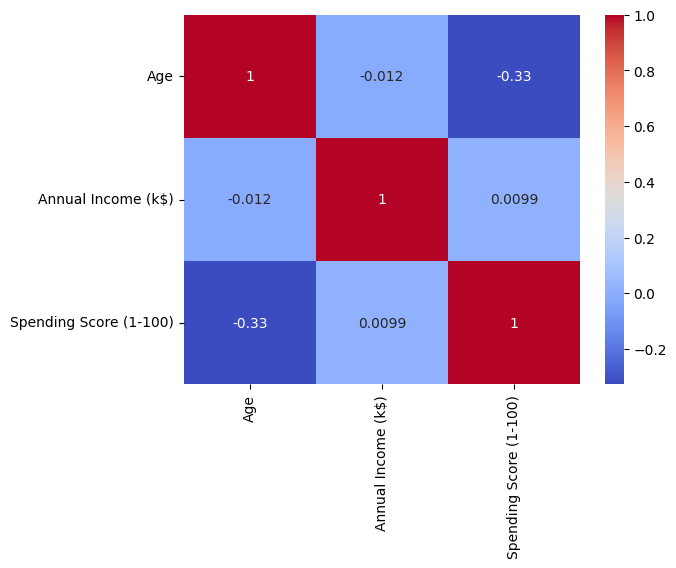

In [13]:
sns.heatmap(Customer_data.corr(numeric_only = True), annot = True, cmap = 'coolwarm');

### Univariate Clustering

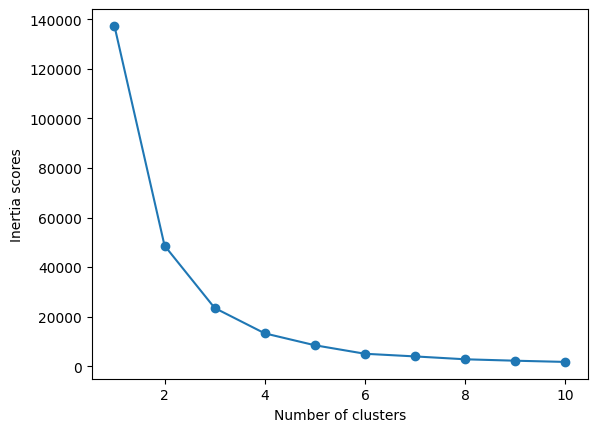

In [14]:
inertia_scores = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(Customer_data[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)

plt.plot(range(1,11), inertia_scores, 'o-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia scores')
plt.show()

In [15]:
cluster1 = KMeans(n_clusters = 3)
cluster1.fit(Customer_data[['Annual Income (k$)']])
Customer_data['Income_cluster'] = cluster1.labels_
Customer_data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income_cluster
CustomerID,,,,,
1,Male,19,15,39,1
2,Male,21,15,81,1
3,Female,20,16,6,1
4,Female,23,16,77,1
5,Female,31,17,40,1


In [16]:
Customer_data.groupby(['Income_cluster'])[columns].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income_cluster,,,
0,37.833333,99.888889,50.638889
1,38.930556,33.027778,50.166667
2,39.184783,66.717391,50.054348


### Bivariate Clustering

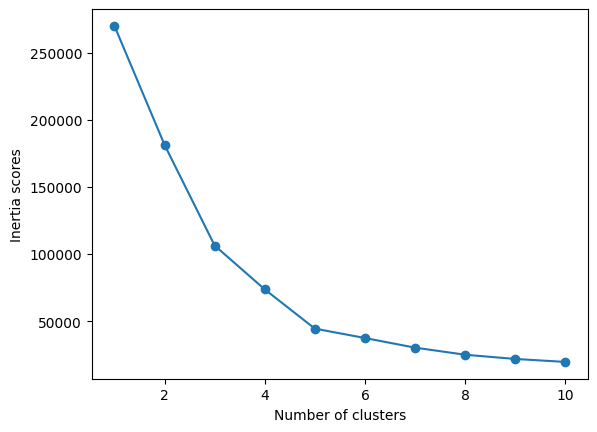

In [17]:
inertia_scores2 = []
for i in range(1, 11):
    kmeans2 = KMeans(n_clusters = i)
    kmeans2.fit(Customer_data[['Annual Income (k$)', 'Spending Score (1-100)']])
    inertia_scores2.append(kmeans2.inertia_)

plt.plot(range(1,11), inertia_scores2, 'o-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia scores')
plt.show()

In [18]:
cluster2 = KMeans(n_clusters = 5)
cluster2.fit(Customer_data[['Annual Income (k$)','Spending Score (1-100)']])
Customer_data['Income and spending cluster'] = cluster2.labels_
Customer_data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income_cluster,Income and spending cluster
CustomerID,,,,,,
1,Male,19,15,39,1,1
2,Male,21,15,81,1,3
3,Female,20,16,6,1,1
4,Female,23,16,77,1,3
5,Female,31,17,40,1,1


In [19]:
centroids = cluster2.cluster_centers_
centroids

array([[88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [55.2962963 , 49.51851852]])

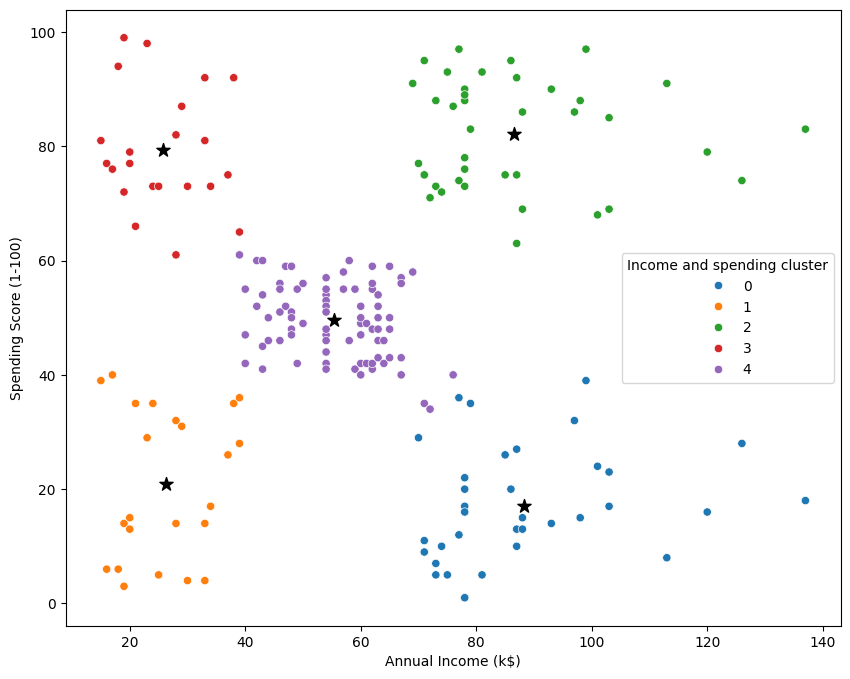

In [20]:
plt.figure(figsize = (10,8))
plt.scatter(x = centroids[:,0], y = centroids[:,1], s = 100, c = 'black', marker = '*')
sns.scatterplot(data = Customer_data, x = 'Annual Income (k$)', y = 'Spending Score (1-100)', hue = 'Income and spending cluster', palette = 'tab10')
plt.show()

In [21]:
pd.crosstab(Customer_data['Income and spending cluster'], Customer_data['Gender'], normalize = 'index')

Gender,Female,Male
Income and spending cluster,,
0,0.457143,0.542857
1,0.608696,0.391304
2,0.538462,0.461538
3,0.590909,0.409091
4,0.592593,0.407407


In [22]:
Customer_data.groupby(['Income and spending cluster'])[columns].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income and spending cluster,,,
0,41.114286,88.200000,17.114286
1,45.217391,26.304348,20.913043
2,32.692308,86.538462,82.128205
3,25.272727,25.727273,79.363636
4,42.716049,55.296296,49.518519


In [23]:
Customer_data[columns].loc[Customer_data['Income and spending cluster'] == 4].describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,81.000000,81.000000,81.000000
mean,42.716049,55.296296,49.518519
std,16.447822,8.988109,6.530909
min,18.000000,39.000000,34.000000
25%,27.000000,48.000000,44.000000
50%,46.000000,54.000000,50.000000
75%,54.000000,62.000000,55.000000
max,70.000000,76.000000,61.000000


### Multivariate Clustering

In [24]:
Customers_data = pd.get_dummies(Customer_data, drop_first = True, dtype = int)
Customers_data.head()

,Age,Annual Income (k$),Spending Score (1-100),Income_cluster,Income and spending cluster,Gender_Male
CustomerID,,,,,,
1,19,15,39,1,1,1
2,21,15,81,1,3,1
3,20,16,6,1,1,0
4,23,16,77,1,3,0
5,31,17,40,1,1,0


In [25]:
Customers_data.rename(columns = {'Gender_Male':'Gender_n'}, inplace = True)
Customers_data.drop(columns = ['Income_cluster','Income and spending cluster'], inplace = True)
Customers_data = Customers_data.loc[:,['Gender_n','Age','Annual Income (k$)','Spending Score (1-100)']]
Customers_data.head()

,Gender_n,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,1,19,15,39
2,1,21,15,81
3,0,20,16,6
4,0,23,16,77
5,0,31,17,40


In [26]:
scaler = StandardScaler()
Scaled_data = pd.DataFrame(scaler.fit_transform(Customers_data))
Scaled_data.columns = ['Gender_T','Age_T','Annual Income (k$)_T','Spending Score (1-100)_T']
Scaled_data.head()

,Gender_T,Age_T,Annual Income (k$)_T,Spending Score (1-100)_T
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980


In [27]:
pca = PCA(n_components = 2)
pca_data = pca.fit_transform(Scaled_data)

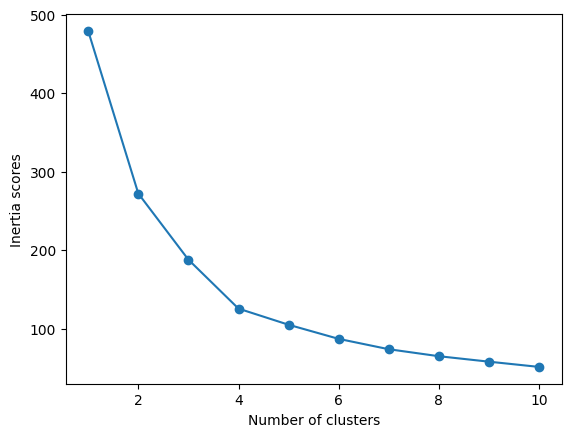

In [28]:
inertia_scores3 = []
for i in range(1, 11):
    kmeans3 = KMeans(n_clusters = i)
    kmeans3.fit(pca_data)
    inertia_scores3.append(kmeans3.inertia_)

plt.plot(range(1,11), inertia_scores3, 'o-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia scores')
plt.show()

In [29]:
Scaled_data[['Component1','Component2']] = pca_data
Scaled_data.head()

,Gender_T,Age_T,Annual Income (k$)_T,Spending Score (1-100)_T,Component1,Component2
0,1.128152,-1.424569,-1.738999,-0.434801,-0.406383,-0.520714
1,1.128152,-1.281035,-1.738999,1.195704,-1.427673,-0.367310
2,-0.886405,-1.352802,-1.700830,-1.715913,0.050761,-1.894068
3,-0.886405,-1.137502,-1.700830,1.040418,-1.694513,-1.631908
4,-0.886405,-0.563369,-1.662660,-0.395980,-0.313108,-1.810483


In [30]:
cluster3 = KMeans(n_clusters = 4)
cluster3.fit(pca_data)
Scaled_data['Clusters'] = cluster3.labels_
Scaled_data.head()

,Gender_T,Age_T,Annual Income (k$)_T,Spending Score (1-100)_T,Component1,Component2,Clusters
0,1.128152,-1.424569,-1.738999,-0.434801,-0.406383,-0.520714,1
1,1.128152,-1.281035,-1.738999,1.195704,-1.427673,-0.367310,1
2,-0.886405,-1.352802,-1.700830,-1.715913,0.050761,-1.894068,3
3,-0.886405,-1.137502,-1.700830,1.040418,-1.694513,-1.631908,1
4,-0.886405,-0.563369,-1.662660,-0.395980,-0.313108,-1.810483,3


In [31]:
centroids3 = cluster3.cluster_centers_
centroids3

array([[ 1.12773395,  0.75231371],
       [-1.15915328, -0.51472072],
       [-0.89924813,  1.20707643],
       [ 0.80089898, -0.95285608]])

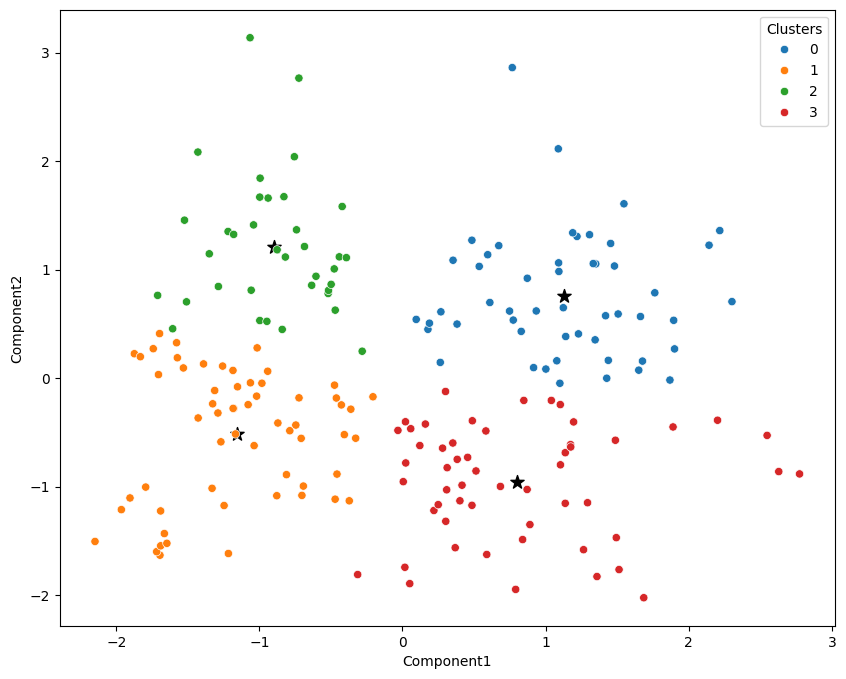

In [32]:
plt.figure(figsize = (10,8))
plt.scatter(x = centroids3[:,0], y = centroids3[:,1], s = 100, c = 'black', marker = '*')
sns.scatterplot(data = Scaled_data, x = 'Component1', y = 'Component2', hue = 'Clusters', palette = 'tab10')
plt.show()

In [33]:
Compare = pd.concat([Customers_data.reset_index(), Scaled_data], axis = 1)
features = ['Age','Annual Income (k$)','Spending Score (1-100)']
Compare.groupby(['Clusters'])[features].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Clusters,,,
0,47.647059,74.627451,30.862745
1,27.152542,49.305085,67.322034
2,30.000000,80.583333,73.833333
3,49.222222,46.222222,34.000000


In [34]:
Compare[features].loc[Compare['Clusters'] == 0].describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,51.000000,51.000000,51.000000
mean,47.647059,74.627451,30.862745
std,13.395258,23.044271,18.026669
min,19.000000,39.000000,1.000000
25%,39.000000,54.000000,14.500000
50%,48.000000,73.000000,32.000000
75%,58.500000,87.500000,46.500000
max,70.000000,137.000000,60.000000
